# Basics of BindCurve

In this tutorial, we will go through the very basics of `bindcurve`. We will fit $\text{IC}_{50}$ for six compounds and plot the results. This will demonstrate the most minimalistic workflow you can do to get your results quickly and easily. For clarity, we will mostly use default settings for all the `bindcurve` functions. There is much more you can do, please see more advanced tutorials for more detailed overview of the available options and settings.

## Preparations

First, let's start by importing `bindcurve`. We will use `bc` as alias to help with clarity. Also, we will import `pandas` and `matplotlib` because we will need it. Don't worry, all dependencies have been installed automatically when installing `bindcurve`.

In [1]:
import bindcurve as bc
import pandas as pd
import matplotlib.pyplot as plt

The following settings adjust the decimals and display width for pandas. This is just for display purposes, all numbers will still be stored with many decimal places.

In [2]:
pd.set_option("display.precision", 2)
pd.set_option('display.width', 200)

## Load the data

With all preparations taken care of, let's load our data from csv file using the `load_csv` function. You can find this data on GitHub in the folder `/tutorials/examples/competitive.csv`. We will load the data into a DataFrame which we will call `input_data`. As you can see, the loaded data have been preprocessed and now newly contain log-transformed concentrations (log c) as well as number of replicates (n_reps) and median response values with SD snd SEM metrics for each concentration point. This has all been added by the `load_csv` function, so that the loaded DataFrame contains all the necessary information for further use in `bindcurve`.

In [3]:
input_data = bc.load_csv("examples/competitive.csv")

print(input_data)

Loading data from examples/competitive.csv
   compound        c  log c  n_reps   r1   r2   r3   r4   r5   r6  median    SD   SEM
0     comp1  2000.00   3.30       6   28   26   29   27   27   25    27.0  1.41  0.58
1     comp1  1000.00   3.00       6   30   28   30   28   32   32    30.0  1.79  0.73
2     comp1   250.00   2.40       6   37   40   37   41   42   38    39.0  2.14  0.87
3     comp1    60.00   1.78       6   60   58   54   58   53   57    57.5  2.66  1.09
4     comp1    15.00   1.18       6   82   84   78   85   84   85    84.0  2.68  1.10
5     comp1     4.00   0.60       6   94   88   91   97   95  100    94.5  4.26  1.74
6     comp1     1.00   0.00       6   97   98   96  102  103  106   100.0  3.93  1.61
7     comp1     0.25  -0.60       6  100  100  101  106  106  108   103.5  3.56  1.45
8     comp1     0.06  -1.22       6  100  101  102   97  109  109   101.5  4.94  2.02
9     comp2  2000.00   3.30       6   27   29   31   26   27   30    28.0  1.97  0.80
10    comp2

We can get the list of compounds available in our data and print the number of them.

In [4]:
compounds = input_data["compound"].unique()
print("Detected compounds:", compounds)
print("No. of detected compounds:", len(compounds))

Detected compounds: ['comp1' 'comp2' 'comp3' 'comp4' 'comp5' 'comp6']
No. of detected compounds: 6


## Fitting the model

Finally, we can fit a logistic model into our data. We will do that by using the `fit_50` function and we will pass the `input_data` DataFrame and the model name as the arguments for this function. The function will output a new Dataframe containing the results, let's call it `IC50_results`. The results contain the following information:

- `n_points`: number of datapoints that were used for fitting
- `IC50`: value of $\text{IC}_{50}$
- `loCL`: lower confidence limit of the 95% confidence interval
- `upCL`: upper confidence limit of the 95% confidence interval
- `SE`: standard error
- `model`: name of the model that was used
- `ymin`: lower asymptote of the model
- `ymax`: upper asymptote of the model
- `slope`: slope of the model
- `Chi^2`: estimate of $\chi^2$ (the lower the better)
- `R^2`: estimate of $R^2$ (the closer to 1 the better)

In [5]:
IC50_results = bc.fit_50(input_data, model="IC50")
print(IC50_results)

Fitting IC50 ...
  compound  n_points   IC50   loCL   upCL    SE model   ymin    ymax  slope    Chi^2   R^2
0    comp1        54  41.89  35.65  49.82  3.37  IC50  25.45  103.37  -0.91   522.48  0.99
1    comp2        54  10.28   8.74  12.06  0.80  IC50  27.32  100.41  -1.06   693.80  0.99
2    comp3        54   2.13   1.67   2.63  0.23  IC50  23.30  104.77  -0.93   894.91  0.98
3    comp4        54   3.77   3.11   4.55  0.36  IC50  24.42  104.83  -1.02  1024.47  0.98
4    comp5        54  32.47  26.70  39.81  3.15  IC50  25.76  100.77  -1.00   929.11  0.98
5    comp6        54   8.97   7.62  10.54  0.71  IC50  23.52  100.92  -0.97   663.17  0.99


We can also get the results as a formatted report using the `report` function. This will provide a convenient report in two formats:

- mean (95% confidence interval)
- mean ± SE

The last line will copy the report into your clipboard, you can then paste the results by CTRL+V anywhere you want.

In [6]:
IC50_report = bc.report(IC50_results, decimals=1)
print(IC50_report)
IC50_report.to_clipboard(excel=True, sep=",")

  compound      Mean (95% CI)   Mean ± SE
0    comp1  41.9 (35.7, 49.8)  41.9 ± 3.4
1    comp2   10.3 (8.7, 12.1)  10.3 ± 0.8
2    comp3     2.1 (1.7, 2.6)   2.1 ± 0.2
3    comp4     3.8 (3.1, 4.5)   3.8 ± 0.4
4    comp5  32.5 (26.7, 39.8)  32.5 ± 3.1
5    comp6    9.0 (7.6, 10.5)   9.0 ± 0.7


## Plotting the curves

Plotting is done using the matplotlib library. We will initiate the plot in a standard way, then we will use the `plot` function, which will retrieve the curve from the model and draws it into the initiated plot. The required arguments for the `plot` function are the DataFrame with the input data (that is used to retrieve the concentration points), and the DataFrame with the results (that is used to draw the curve). Then we can use any common matplotlib settings, here we will set up title, axis labels, and set x axis to log scale. This way you have a lot of flexibility in designing your plot.

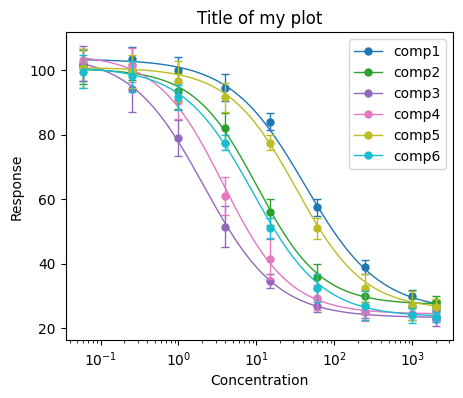

In [9]:
plt.figure(figsize=(5, 4))

bc.plot(input_data, IC50_results)

plt.title("Title of my plot")
plt.xlabel("Concentration")
plt.ylabel("Response")
plt.xscale("log")
plt.legend()

# Uncomment the below line if you want to save your plot as png
#plt.savefig("my_plot.png", dpi=300) 

plt.show()

We can also plot just a selected compounds using the `compound_sel` argument. The selection is supplied as a list of compound names. In the following example, we will plot just the comp3 and com6 compounds.

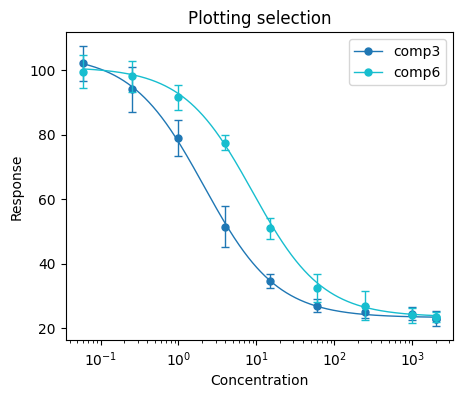

In [10]:
plt.figure(figsize=(5, 4))

bc.plot(input_data, IC50_results, compound_sel=["comp3", "comp6"])

plt.title("Plotting selection")
plt.xlabel("Concentration")
plt.ylabel("Response")
plt.xscale("log")
plt.legend()
plt.show()

Finally, you can also plot the compounds on a grid using the `plot_grid` function. To do this, you don't initiate the matplotlib plot in advance as in the case of the `plot` function. Instead, everything is executed by a single line of code. You have to supply all the settings as arguments into the `plot_grid` function. Here we will use the default settings. We just need to supply the `n_cols` argument to define the number of columns (number of rows is then determined automatically), and the `figsize` argument to define the figure size.

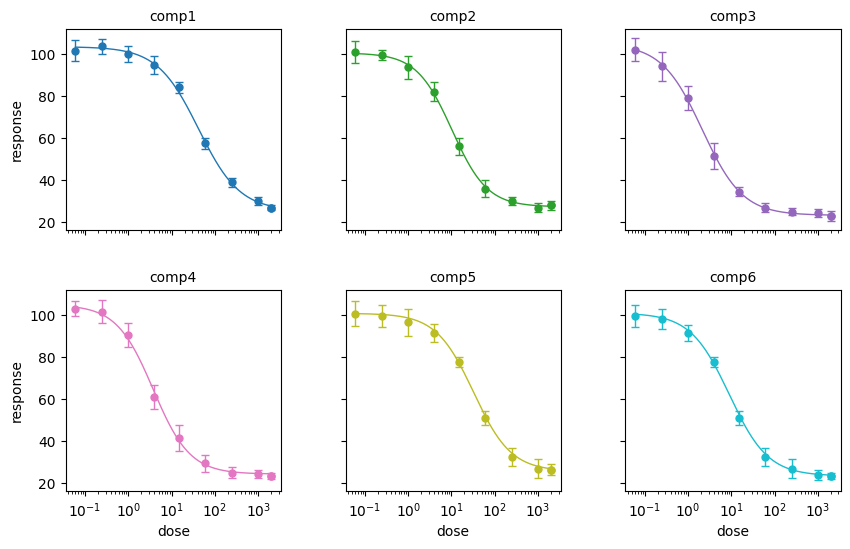

In [12]:
bc.plot_grid(input_data, IC50_results, n_cols=3, figsize=(10,6))